In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

latcorners = [30, 48]
loncorners = [-7, 46]
lat_min, lat_max = latcorners
lon_min, lon_max = loncorners

basemap_obj = Basemap(
    projection='geos',
    rsphere=(6378137.0, 6356752.3142),
    resolution='i',
    area_thresh=10000.,
    lon_0=9.5,
    satellite_height=3.5785831E7,
    llcrnrlon=lon_min,
    llcrnrlat=lat_min,
    urcrnrlon=lon_max,
    urcrnrlat=lat_max)

x_center, y_center = basemap_obj(9.5, 0)

image_w, image_h = 1290, 420

# Calling a Basemap class instance with the arguments lon, lat
# will convert lon/lat (in degrees) to x/y map projection coordinates *(in meters)*:
Xmin, Ymin = basemap_obj(lon_min, lat_min)
Xmax, Ymax = basemap_obj(lon_max, lat_max)

# -> da metri a km
Xmin, Ymin = Xmin/1000.0, Ymin/1000.0
Xmax, Ymax = Xmax/1000.0, Ymax/1000.0

# quanti "pixel al km" in orizzontale e verticale
px_scale_x = image_w / (Xmax - Xmin)
px_scale_y = image_h / (Ymax - Ymin)

In [2]:
basemap_obj(-7, 30)

(4.6566128730773926e-09, 1.3969838619232178e-09)

In [3]:
print(f"Xmin, Ymin = {Xmin, Ymin} \t Xmax, Ymax = {Xmax, Ymax}")
print(f"Larghezza in km: {round(Xmax - Xmin, 1)} \t altezza in km: {round(Ymax - Ymin, 1)}")
print(f"pixel al km (x): {px_scale_x} \t pixel al km (y): {px_scale_y}")
print(f"km al pixel (x): {1/px_scale_x} \t km al pixel (y): {1/px_scale_y}")

Xmin, Ymin = (4.656612873077393e-12, 1.3969838619232178e-12) 	 Xmax, Ymax = (3870.070653520385, 1260.6826438542405)
Larghezza in km: 3870.1 	 altezza in km: 1260.7
pixel al km (x): 0.3333272478698965 	 pixel al km (y): 0.3331528375102788
km al pixel (x): 3.0000547701708373 	 km al pixel (y): 3.001625342510093


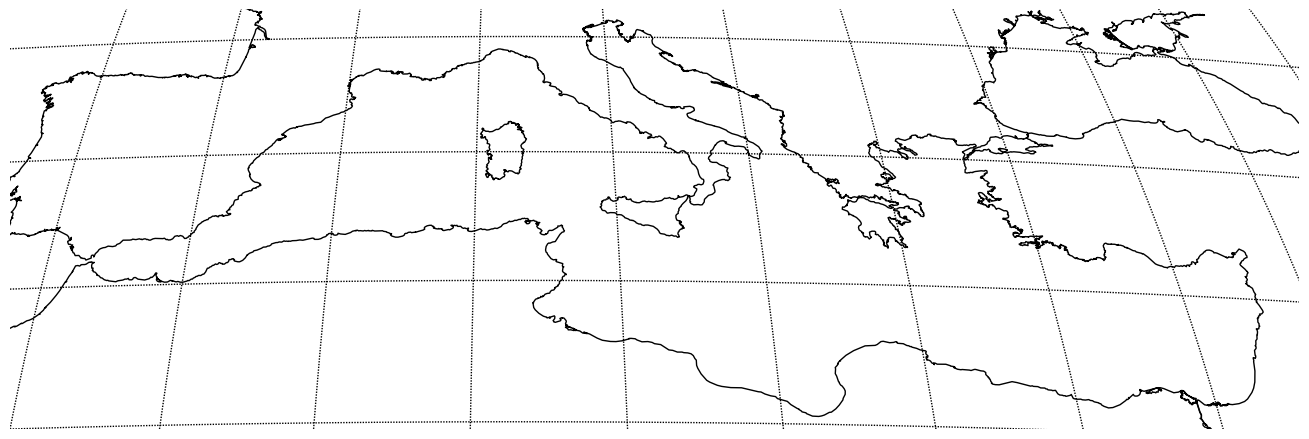

420 1290


In [14]:
dpi = 100
fig = plt.figure(figsize=(image_w/dpi, image_h/dpi), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])
ax.set_position([0, 0, 1, 1])

ax.set_xlim(basemap_obj.xmin, basemap_obj.xmax)
ax.set_ylim(basemap_obj.ymin, basemap_obj.ymax)

basemap_obj.drawcoastlines()
dparal=5.0 #separation in deg between drawn parallels
parallels = np.arange(lat_min,lat_max,dparal)
dmerid=5.0 #separation in deg between drawn meridians
meridians = np.arange(lon_min,lon_max,dmerid)
basemap_obj.drawparallels(parallels,labels=[0,0,0,0],fontsize=10);  #,weight='bold')
basemap_obj.drawmeridians(meridians,labels=[0,0,0,0],fontsize=10, rotation=45);  #,weight='bold')

ax.set_axis_off()


#plt.axis('off') 

buf = BytesIO()
plt.savefig(buf, format='png', pad_inches=0, bbox_inches=None)  # bbox_inches='tight'
plt.show()
plt.close(fig)  # Chiude la figura per liberare memoria
buf.seek(0)

# Converte il buffer in un'immagine PIL
img_pil = Image.open(buf)
print(img_pil.height, img_pil.width)



### Verifiche grafiche

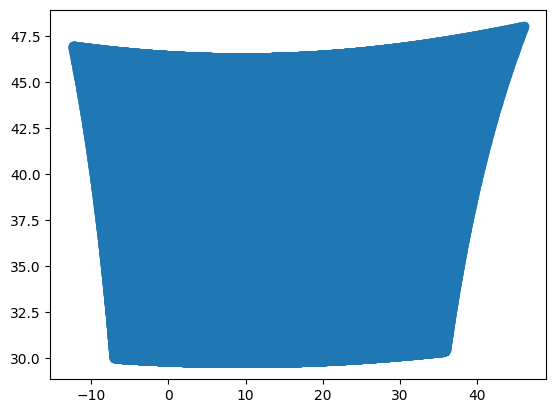

In [9]:
plt.scatter(lon,lat)

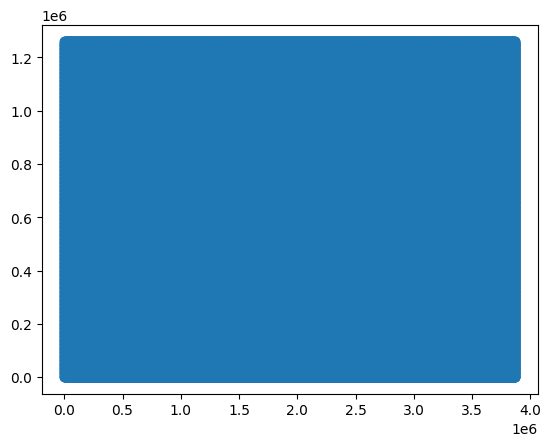

In [10]:
plt.scatter(x,y)

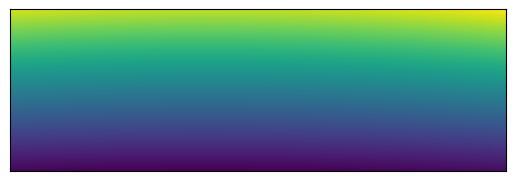

In [11]:
basemap_obj.imshow(lat)

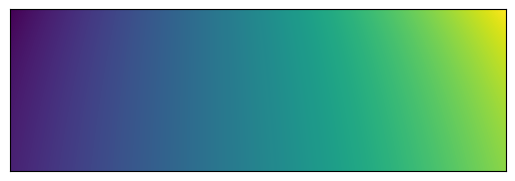

In [12]:
basemap_obj.imshow(lon)

# Trova i pixel a partire dalle coordinate

In [3]:
from geo_const import get_lon_lat_grid_2_pixel, trova_indici_vicini

In [8]:
# prendo la griglia di lat e lon corrispondenti ai pixel dell'immagine
image_w=1290
image_h=420
lon_grid, lat_grid, x, y = get_lon_lat_grid_2_pixel(image_w, image_h)
lon_grid.shape, lat_grid.shape
# succede che la shape è inversa... chissà perché

((420, 1290), (420, 1290))

In [9]:
lon1, lat1 = [13,40]
px, py = trova_indici_vicini(lon_grid, lat_grid, lon1, lat1)
# visto che la shape è inversa
print(lon_grid[py][px], lat_grid[py][px])

# rigiro la y perché parte dall'alto
py = image_h - py
#px = image_w - px
px, py

13.004421467987447 39.98545216900632


(603, 144)

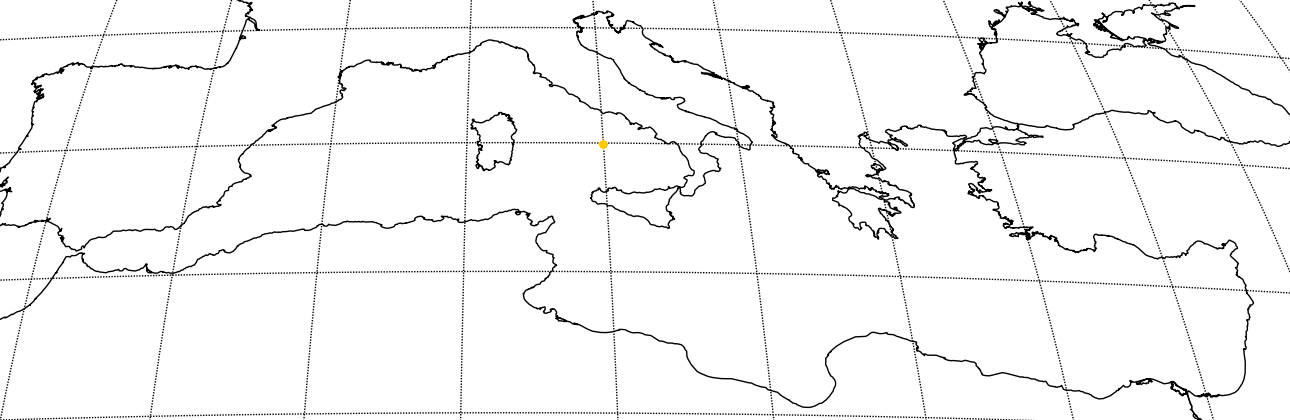

In [15]:
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(img_pil)
point_color=(255, 200, 0)
point_radius=4
draw.ellipse([(px - point_radius, py - point_radius),
              (px + point_radius, py + point_radius)],
                fill=point_color)
display(img_pil)